<a href="https://colab.research.google.com/github/xuziyue/tensorflow-models/blob/main/TCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Time Series Fundamentals

### Features:

*   Trend
*   Seasonality
*   Auto-correlation
*   noise



### Generate Time Series

In [1]:
import matplotlib.pyplot as plt
import numpy as np

1. Plot Utilities

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    if label:
      plt.legend(fontsize=14, labels=label)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

2. Trend

In [3]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

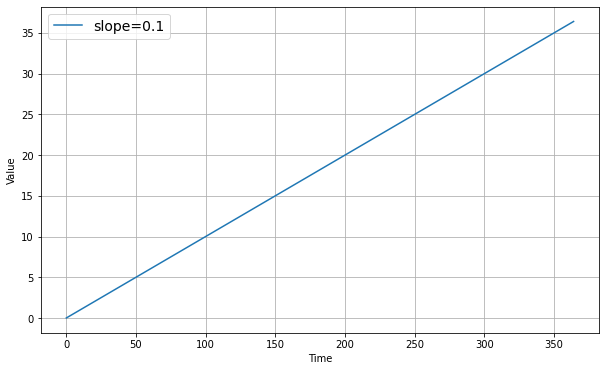

In [4]:
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope (You can revise this)
slope = 0.1

# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label=[f'slope={slope}'])

3. Seasonality

In [11]:
def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    # time % period is 0 to period - 1
    # so, (time % period) / period is 0 to (period - 1) / period
    season_time = ((time + phase) % period) / period
    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

[0.0, 0.0027397260273972603, 0.005479452054794521, 0.00821917808219178, 0.010958904109589041, 0.0136986301369863, 0.01643835616438356, 0.019178082191780823, 0.021917808219178082, 0.024657534246575342, 0.0273972602739726, 0.030136986301369864, 0.03287671232876712, 0.03561643835616438, 0.038356164383561646, 0.0410958904109589, 0.043835616438356165, 0.04657534246575343, 0.049315068493150684, 0.052054794520547946, 0.0547945205479452, 0.057534246575342465, 0.06027397260273973, 0.06301369863013699, 0.06575342465753424, 0.0684931506849315, 0.07123287671232877, 0.07397260273972603, 0.07671232876712329, 0.07945205479452055, 0.0821917808219178, 0.08493150684931507, 0.08767123287671233, 0.09041095890410959, 0.09315068493150686, 0.0958904109589041, 0.09863013698630137, 0.10136986301369863, 0.10410958904109589, 0.10684931506849316, 0.1095890410958904, 0.11232876712328767, 0.11506849315068493, 0.1178082191780822, 0.12054794520547946, 0.1232876712328767, 0.12602739726027398, 0.12876712328767123, 0.13

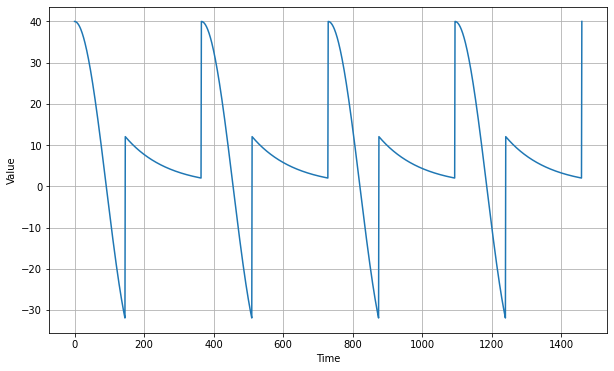

In [30]:
# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

# series2 = seasonality(time, period=period, amplitude=amplitude, phase = 100)
# plot_series(time, series2)

4. Noise

In [31]:
def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal

    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

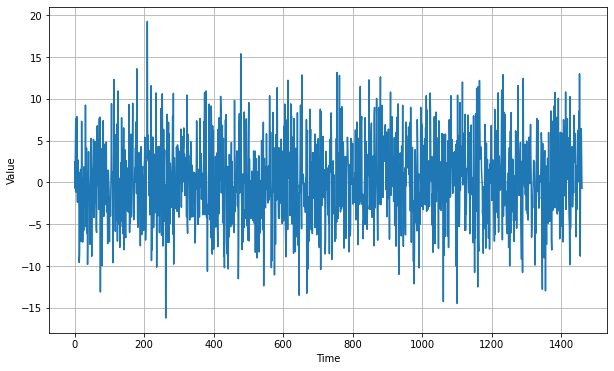

In [32]:
# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the results
plot_series(time, noise_signal)

5. Combination

[0.0, 0.0027397260273972603, 0.005479452054794521, 0.00821917808219178, 0.010958904109589041, 0.0136986301369863, 0.01643835616438356, 0.019178082191780823, 0.021917808219178082, 0.024657534246575342, 0.0273972602739726, 0.030136986301369864, 0.03287671232876712, 0.03561643835616438, 0.038356164383561646, 0.0410958904109589, 0.043835616438356165, 0.04657534246575343, 0.049315068493150684, 0.052054794520547946, 0.0547945205479452, 0.057534246575342465, 0.06027397260273973, 0.06301369863013699, 0.06575342465753424, 0.0684931506849315, 0.07123287671232877, 0.07397260273972603, 0.07671232876712329, 0.07945205479452055, 0.0821917808219178, 0.08493150684931507, 0.08767123287671233, 0.09041095890410959, 0.09315068493150686, 0.0958904109589041, 0.09863013698630137, 0.10136986301369863, 0.10410958904109589, 0.10684931506849316, 0.1095890410958904, 0.11232876712328767, 0.11506849315068493, 0.1178082191780822, 0.12054794520547946, 0.1232876712328767, 0.12602739726027398, 0.12876712328767123, 0.13

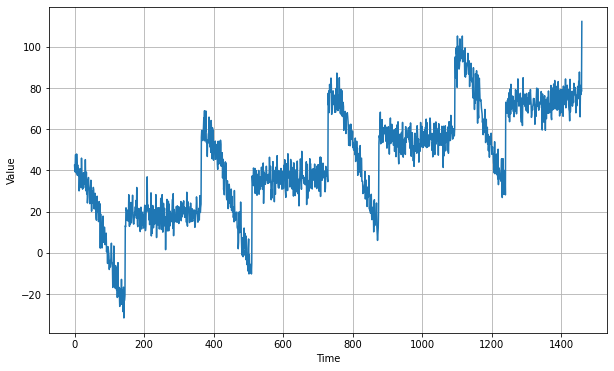

In [33]:
slope = 0.05
period = 365
amplitude = 40
noise_level = 5

series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude) +\
         noise(time, noise_level=noise_level, seed=42)
plot_series(time, series)

6. Autocorrelation

In [38]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)
    
    # Initialize array of random numbers equal to the length 
    # of the given time steps plus 50
    ar = rnd.randn(len(time) + 50)
    
    # Set first 50 elements to a constant
    ar[:50] = 100
    
    # Define scaling factors
    phi1 = 0.5
    phi2 = -0.1

    # Autocorrelate element 51 onwards with the measurement at 
    # (t-50) and (t-30), where t is the current time step
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]
    
    # Get the autocorrelated data and scale with the given amplitude.
    # The first 50 elements of the original array is truncated because
    # those are just constant and not autocorrelated.
    ar = ar[50:] * amplitude

    return ar

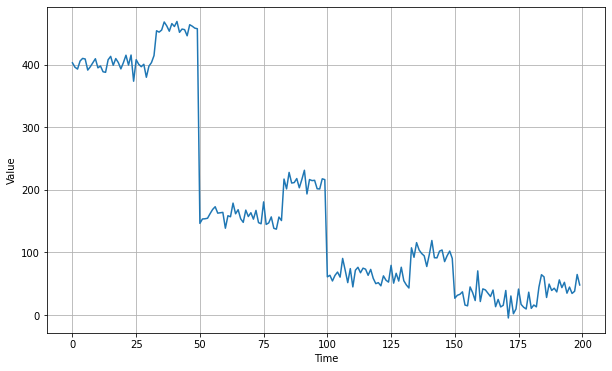

In [39]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

In [40]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    """
    Generates random impulses

    Args:
      time (array of int) - contains the time steps
      num_impulses (int) - number of impulses to generate
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Generate random numbers
    impulse_indices = rnd.randint(len(time), size=num_impulses)

    # Initialize series
    series = np.zeros(len(time))

    # Insert random impulses
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude

    return series    

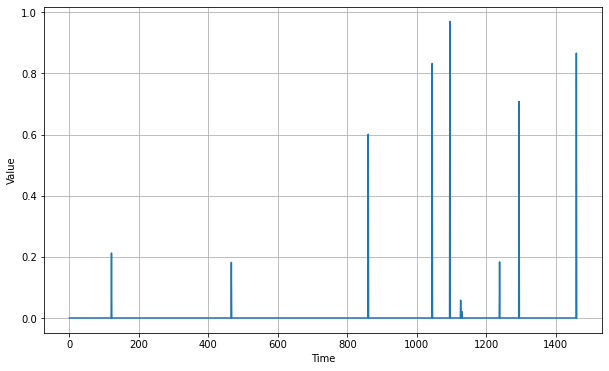

In [41]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

In [43]:
def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

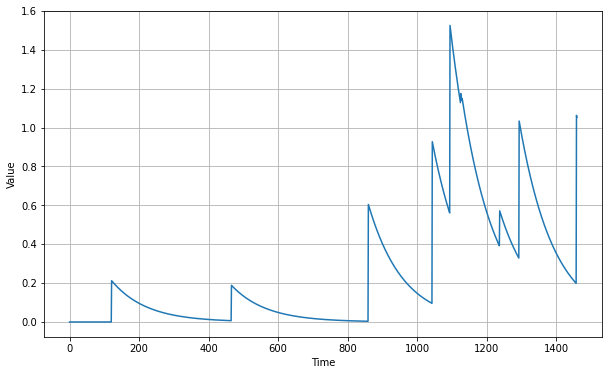

In [44]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

7. Non-stationary Time Series

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.

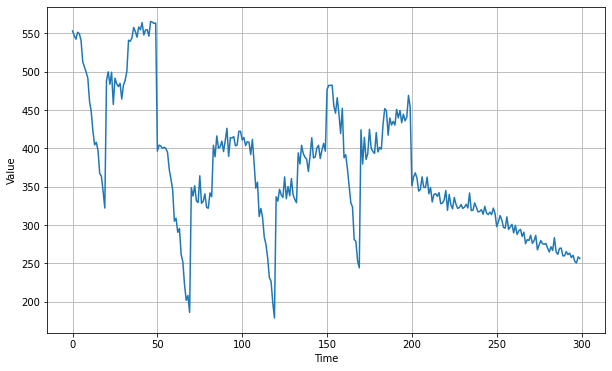

In [47]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])